In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [224]:
df = pd.read_csv("train.csv")

## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

<a style="color: red;"> アイオア州のエイムズにある住宅1,460棟について、79個の説明変数と1個の目的変数をもつデータセット。<br>
家の大きさ、地下室の面積、住宅材料、プール面積等々の特徴（説明変数）と、その住宅価格（目的変数）をもつデータセット</a>

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

<ul>
<li>各特徴量がどういったものかを見る。（数値データか文字データなど）</li>
<li>今回の目的変数はどの列か確認する。</li>
<li>特徴量の平均値と標準偏差、四分位数を一度に表示させる。</li>
</ul>    

### 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [225]:
## 各特徴量がどういったものかを見る。（数値データか文字データなど）
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 今回の目的変数はどの列か確認する。

目的変数は「SalePrice」<br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">KaggleのDataページの「Data fields」より</a>

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。


In [226]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

<ul>
    <li>各特徴量の欠損値の有無を確認する。</li>
</ul>

欠損値の確認にはmissingnoというライブラリを活用しましょう。

このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。


<a href="https://github.com/ResidentMario/missingno">ResidentMario/missingno: Missing data visualization module for Python.</a>

<ul>
<li>欠損値が何パーセント含まれるかを確認する。</li>
<li>    5つ以上欠損値がある特徴量（列）は削除する。</li>
<li>欠損値があるサンプル（行）は削除する。</li>
</ul>

### 各特徴量の欠損値の有無を確認する。

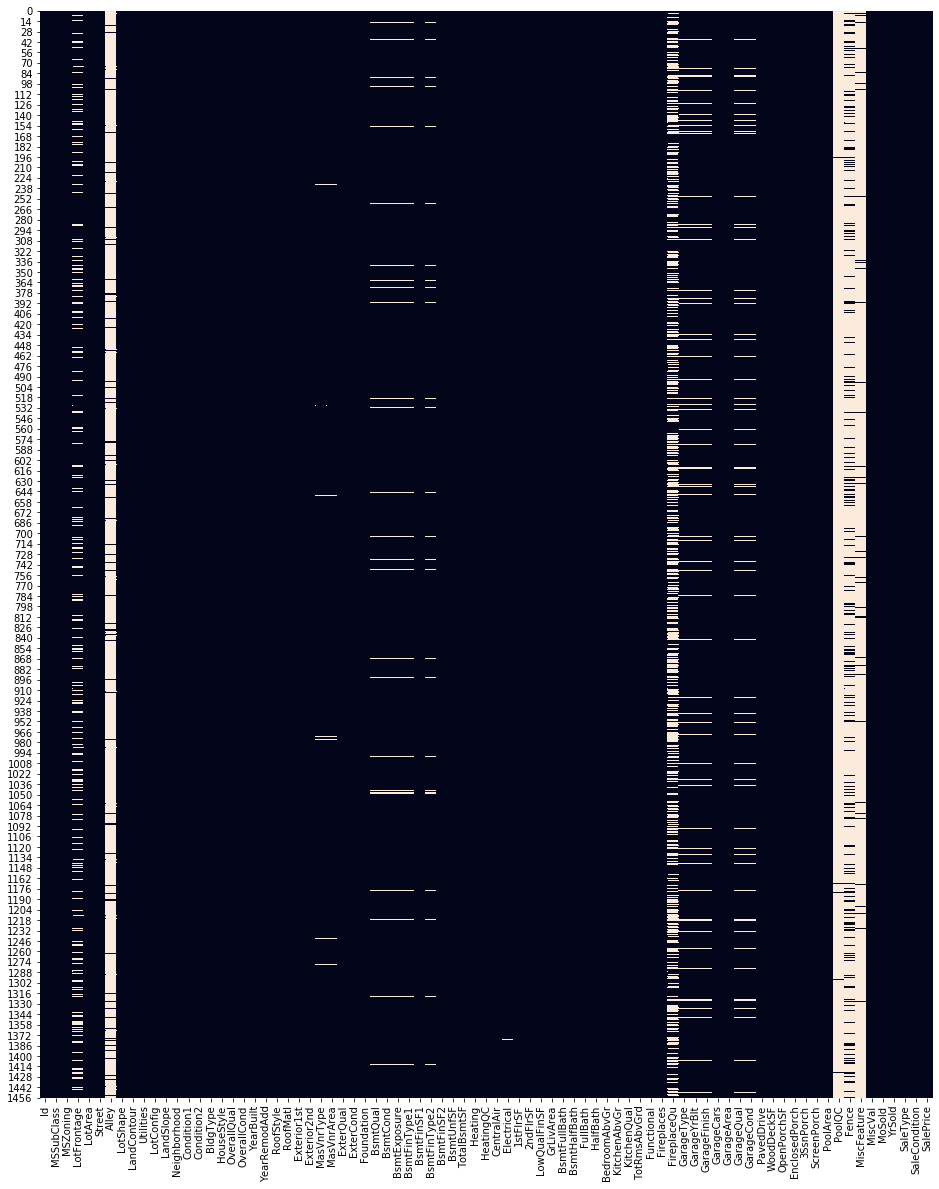

In [227]:
plt.figure(figsize=(16,20))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### 損値が何パーセント含まれるかを確認する。

In [228]:
#各列の欠損値の数
missing_sum = df.isnull().sum() 
#各列の欠損値の割合を算出し、結合する
df_missing_ratio = pd.concat((missing_sum, missing_sum / len(df)), axis=1)
#列名の付与
df_missing_ratio.rename(columns={0: "total", 1: "missing_ratio"}, inplace=True)

#欠損が含まれる列のみを抽出し、欠損率が高い特徴順に出力
df_missing_ratio[df_missing_ratio["missing_ratio"] > 0].sort_values(by="missing_ratio", ascending=False)

,total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [229]:
# 5つ以上欠損値がある特徴量（列）は削除する。
df.dropna(axis=1, thresh=len(df)-6, inplace=True)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [230]:
#欠損値があるサンプル（行）は削除する。
df.dropna(axis=0, inplace=True)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

<ul>
<li>尖度</li>
<li>歪度</li>
</ul>


###  尖度

分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。<br>
サンプルサイズをn、各データ $x_i$(i:1,2,…,n)の平均値を$\overline{x}$、標準偏差をsとすると尖度は次の式で求められる。
<br>
<br>
<div align="left">
<img src="https://bellcurve.jp/statistics/wp-body/wp-content/ql-cache/quicklatex.com-16b97947df61268da80b850b096bb02b_l3.png">
</div>

正規分布より尖った分布のときには正の値を、正規分布より扁平な分布のときには負の値をとる。正規分布と重なる場合は０となる。  
生徒の身長データの分布より尖度を算出した例がこちら

![](http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/2b530e80c7d0de90885e285c5d798063.png)

### 歪度
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。  
サンプルサイズをn、各データ$x_i$(i:1,2…n)の平均値を$\overline{x}$、標準偏差をsとすると歪度は次の式で求まる。
<br>
<br>
![](https://bellcurve.jp/statistics/wp-body/wp-content/ql-cache/quicklatex.com-ed33dd7b937bc96f531b8d882aa48844_l3.png)

「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、  
「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。  
左右対称の分布（例えば正規分布）の場合には0になります。

生徒の身長データから歪度を算出した例がこちら。

![](http://bellcurve.jp/statistics/wp-body/wp-content/uploads/2018/01/795316b92fc766b0181f6fef074f03fa.png)

## 【問題6】分布の確認
* seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
* 目的変数に対して対数変換を行う。
* 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

### seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

尖度： 1.8819429948035529
歪度： 6.529263049673958


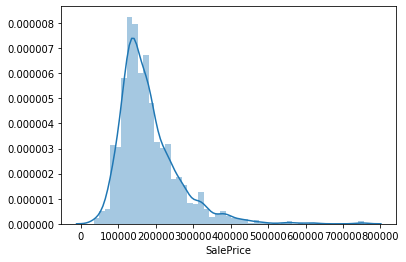

In [231]:
y = df["SalePrice"]
sns.distplot(y)
print("尖度：", y.skew())
print("歪度：", y.kurt())

### 目的変数に対して対数変換を行う。

In [232]:
y_log = df["SalePrice"].apply(np.log)

### 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

尖度： 0.12131775882415026
歪度： 0.806927847502148


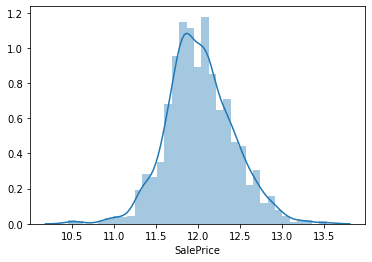

In [233]:
sns.distplot(y_log)
print("尖度：", y_log.skew())
print("歪度：", y_log.kurt())

### 対数変換の前後の変化について

対数変換により変換後の分布は変換前に比べ「尖度」「歪度」が０の値に近づき、正規分布に近い分布を得られる。  
これは、対数変換を行うことでスケールの大きい値は縮小し、逆に小さい値は拡大されることに依る。  
対数変換は主に以下の目的で使用されることが多い。
* 正規分布に従わせる
* 分散を減らす

※機械学習手法では母集団に正規分布を仮定している**パラメトリックモデル**を使用する場合に、  
データの分布を正規分布にする必要があるためこの手法が用いられる。

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


* 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
* 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
* 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
* 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

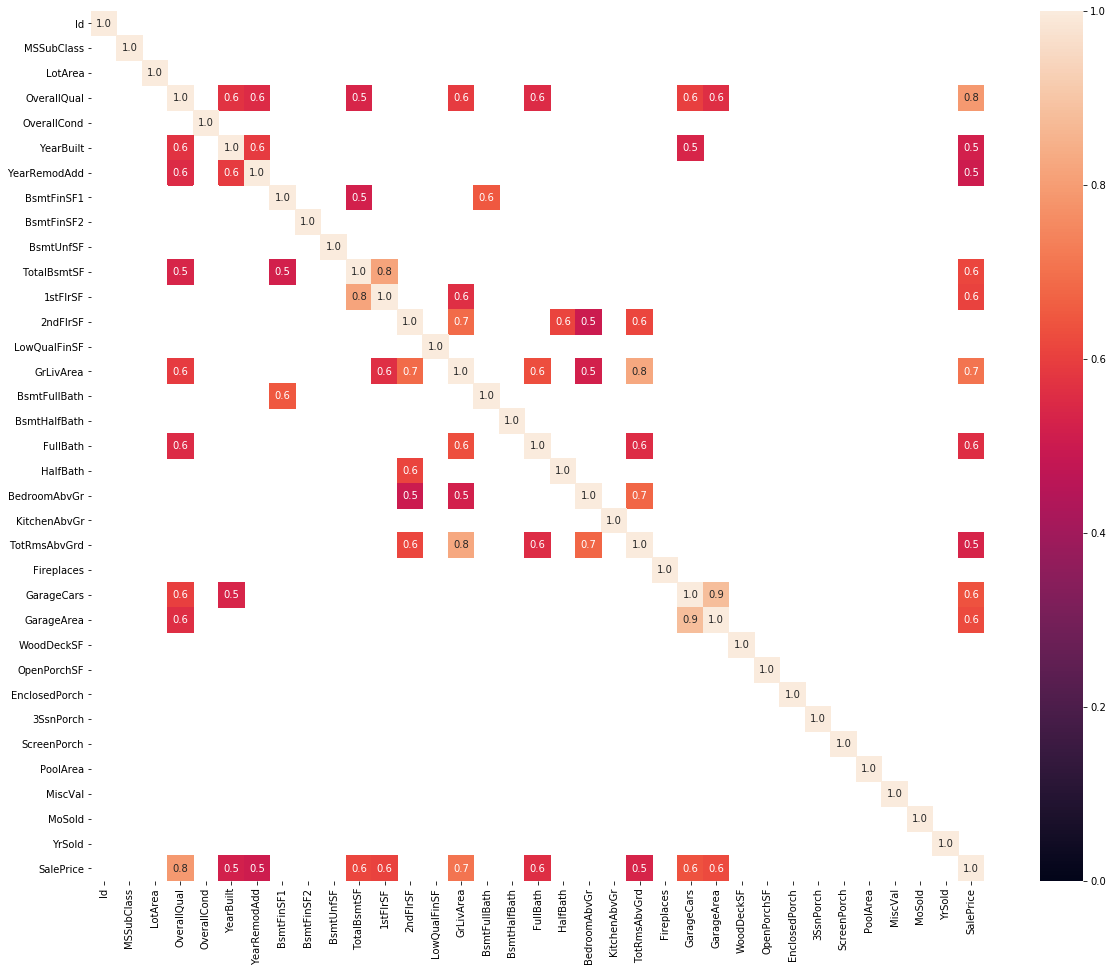

In [236]:
#dfの相関係数行列をつくる
corr_mat = df.corr()

fig = plt.figure(figsize=(20,16))
#相関係数行列のヒートマップを作る（相関係数が0.5以下のタイルはマスクする）
sns.heatmap(corr_mat, vmin=0, vmax=1, annot=True, fmt="1.1f", mask=(corr_mat < 0.5))
plt.ylim(len(corr_mat), 0)
plt.show()

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

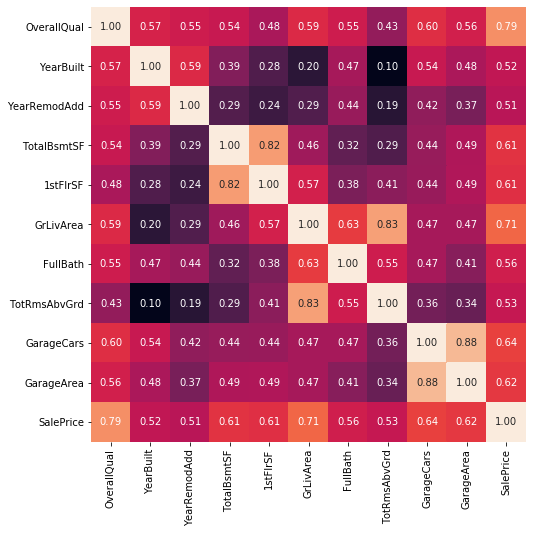

In [237]:
#目的変数「SalePrice」に対して相関係数が0.5以上の行列を取得
selected_corr_mat = corr_mat.loc[corr_mat["SalePrice"].abs() >= 0.5, corr_mat["SalePrice"].abs() >= 0.5]

fig = plt.figure(figsize=(8,8))
#目的変数との相関が高い特徴量のヒートマップを作成
sns.heatmap(selected_corr_mat, annot=True, fmt="1.2f",cbar=False, square=True)

#上下のタイルが見切れるため補正
plt.ylim(len(selected_corr_mat),0) 
plt.show()

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

OverallQual    ：全体的な住宅の素材と仕上りの質のランク<br>
YearBuilt      ：住宅の建築年<br>
YearRemodAdd   ：住宅をリフォームした年<br>
TotalBsmtSF    ：住宅の地下室の面積（$ft^2$）<br>
1stFlrSF       ：住宅1階部分の面積（$ft^2$）<br>
GrLivArea      ：住宅の地上部分の居住面積（$ft^2$）<br>
FullBath       ：住宅の地上部分のフルバスルームの数<br>
TotRmsAbvGrd   ：住宅の地上部分の部屋数<br>
GarageCars     ：車庫に入る車の数<br>
GarageArea     ：車庫の面積（$ft^2$）<br>

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [240]:
#相関係数が0.8以上の特徴間の相関に対して注目
selected_corr_mat[selected_corr_mat >= 0.8].dropna(thresh=2, axis=1).dropna(thresh=2, axis=0)

,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea
TotalBsmtSF,1.000000,0.819393,NaN,NaN,NaN,NaN
1stFlrSF,0.819393,1.000000,NaN,NaN,NaN,NaN
GrLivArea,NaN,NaN,1.000000,0.825576,NaN,NaN
TotRmsAbvGrd,NaN,NaN,0.825576,1.000000,NaN,NaN
GarageCars,NaN,NaN,NaN,NaN,1.000000,0.882613
GarageArea,NaN,NaN,NaN,NaN,0.882613,1.000000


お互いの相関係数が高い組み合わせ
* TotalBsmtSF　＆　1stFlrSF
* TotRmsAbvGrd　＆　GrLivArea
* GarageArea　＆　	GarageCars